In [9]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
import os
import warnings
# 禁用警告
warnings.filterwarnings("ignore")
device="cuda"
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
import torch.nn as nn
import gc
import time
from torch.utils.data import DataLoader
from transformers import get_linear_schedule_with_warmup
from sklearn.model_selection import GroupKFold
NUM_WORKERS = 4
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
from datetime import datetime

In [10]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year -3, end.month-0, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [11]:
company_data = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
for company_data, com_name in zip(company_data, company_name):
    company_data["company_name"] = com_name
    
# df = pd.concat(company_list, axis=0)
# df.tail(10)

In [22]:
AAPL_Close_df = AAPL.filter(['Close'])
print(AAPL_Close_df.shape)
print(type(AAPL_Close_df))
AAPL_Close = AAPL_Close_df.values
print(AAPL_Close.shape)
print(type(AAPL_Close))

(755, 1)
<class 'pandas.core.frame.DataFrame'>
(755, 1)
<class 'numpy.ndarray'>


In [23]:
# 归一化
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
AAPL_Close = scaler.fit_transform(AAPL_Close)

AAPL_Close
print(AAPL_Close.shape)

(755, 1)


In [41]:
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
num_sample = 10
training_data_len = int(np.ceil(len(AAPL_Close)*0.8))
for i in range(num_sample,training_data_len):
    print(i)
    x_train.append(AAPL_Close[i-num_sample:i])
    y_train.append(AAPL_Close[i])
    print(AAPL_Close[i-num_sample:i].shape,AAPL_Close[i])

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape,y_train.shape)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))
print(x_train.shape,y_train.shape,type(x_train),type(y_train))

# # dataset = np.column_stack((data, labels))
# dataset = np.column_stack((x_train, y_train))

10
(10, 1) [0.10405764]
11
(10, 1) [0.08824552]
12
(10, 1) [0.09533772]
13
(10, 1) [0.08022316]
14
(10, 1) [0.03964651]
15
(10, 1) [0.05499356]
16
(10, 1) [0.0649924]
17
(10, 1) [0.07150325]
18
(10, 1) [0.10010465]
19
(10, 1) [0.14277409]
20
(10, 1) [0.14695966]
21
(10, 1) [0.14533195]
22
(10, 1) [0.1373096]
23
(10, 1) [0.15474943]
24
(10, 1) [0.16207413]
25
(10, 1) [0.1318451]
26
(10, 1) [0.14881986]
27
(10, 1) [0.13916989]
28
(10, 1) [0.1318451]
29
(10, 1) [0.20276707]
30
(10, 1) [0.20195322]
31
(10, 1) [0.21230084]
32
(10, 1) [0.18858275]
33
(10, 1) [0.20683635]
34
(10, 1) [0.24927338]
35
(10, 1) [0.23857697]
36
(10, 1) [0.25031973]
37
(10, 1) [0.30519709]
38
(10, 1) [0.28403667]
39
(10, 1) [0.2706662]
40
(10, 1) [0.25869087]
41
(10, 1) [0.22055578]
42
(10, 1) [0.23915816]
43
(10, 1) [0.1878851]
44
(10, 1) [0.23811181]
45
(10, 1) [0.25124988]
46
(10, 1) [0.21555627]
47
(10, 1) [0.21346357]
48
(10, 1) [0.23776303]
49
(10, 1) [0.2147425]
50
(10, 1) [0.19416345]
51
(10, 1) [0.2021858]


In [52]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (10,1)))
model.add(LSTM(64, return_sequences=True)),
model.add(LSTM(32, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [53]:
print(model)

In [58]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=16, epochs=10)

Epoch 1/10


38/38 [==============================] - 4s 8ms/step - loss: 0.0053
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0025
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 8/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0021
Epoch 9/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 10/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0019


In [59]:

test_data = AAPL_Close[training_data_len-num_sample:]
# print(test_data)
x_test = []
y_test = []
for i in range(num_sample, len(test_data)):
    # print(i)
    # print(test_data[i-10:i])
    x_test.append(test_data[i-num_sample:i])
    y_test.append(test_data[i])
    
# Convert the data to a numpy array
x_test,y_test = np.array(x_test),np.array(y_test)
# print(x_test)
# print(x_test.shape,y_test.shape)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
y_test = np.reshape(y_test, (y_test.shape[0], 1 ))
# print(x_test.shape,y_test.shape)
# print(x_test)
# Get the models predicted price values 
predictions = model.predict(x_test)
# print(predictions.shape)
# print(predictions)
predictions = scaler.inverse_transform(predictions)
# print(predictions)
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 4ms/step


175.67448635150424

Date
2023-03-30    158.547058
2023-03-31    159.621246
2023-04-03    161.629608
2023-04-04    163.895752
2023-04-05    165.377136
                 ...    
2023-10-27    168.691391
2023-10-30    167.081802
2023-10-31    166.883499
2023-11-01    167.751511
2023-11-02    169.853348
Name: Predictions, Length: 151, dtype: float32


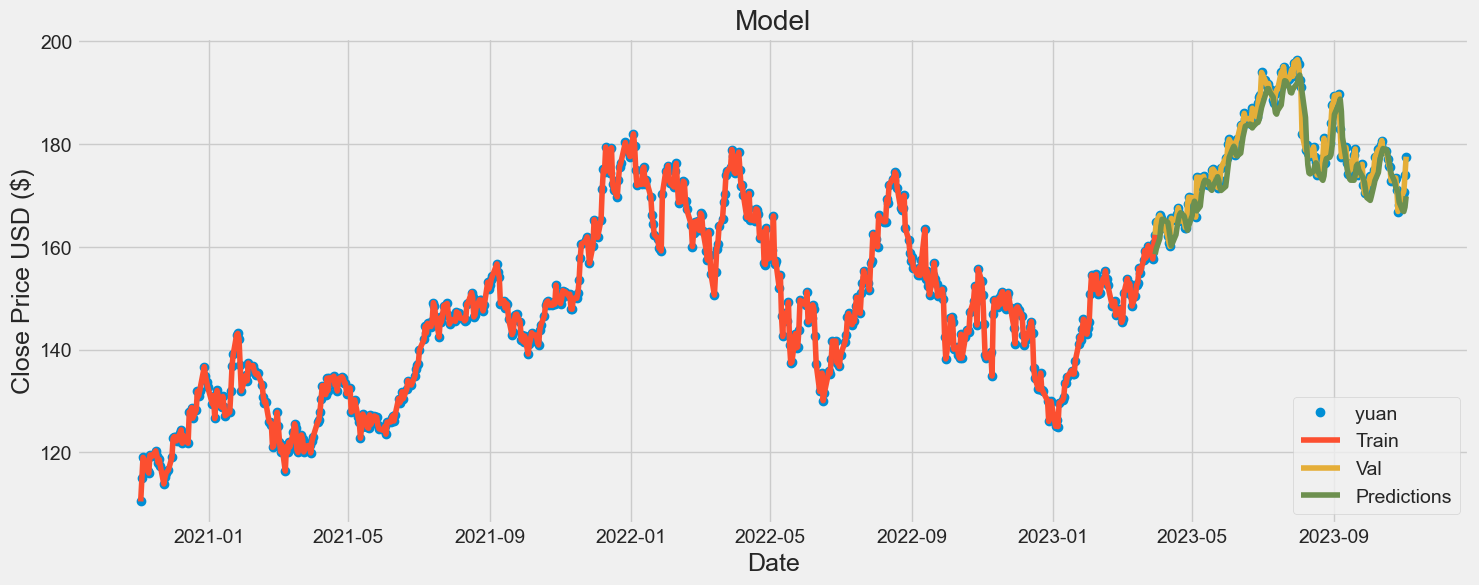

In [60]:
# Plot the data
train = AAPL_Close_df[:training_data_len+1]
valid = AAPL_Close_df[training_data_len:]

valid['Predictions'] = predictions
print(valid['Predictions'])
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(AAPL_Close_df['Close'],'o')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['yuan ','Train', 'Val', 'Predictions'], loc='lower right')
plt.show()